# Cambio de hábitos alimentcios y actividad física. 

## Hipótesis:
* Debido al confinamiento implementado durante la pandemia ocasionada por el COVID 19, los alumnos de séptimo a noveno semestre de la licenciatura en actuaría de FCFM han cambiado sus hábitos alimenticios o de actividad física.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Renombre y limpieza

In [2]:
df_data = pd.read_csv("data.csv")

In [3]:
df_data.drop('Correo electrónico', inplace=True, axis=1)
df_data.drop('Nombre', inplace=True, axis=1)
df_data.drop('Hora de inicio', inplace=True, axis=1)
df_data.drop('Hora de finalización', inplace=True, axis=1)

In [4]:
df_data.columns = ['id', 'carrera', 'semestre', 'genero', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6']

In [5]:
df_data.head()

,id,carrera,semestre,genero,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,b1,b2,b3,b4,b5,b6
0,1,Si,9no semestre,Masculino,De acuerdo,Ni en desacuerdo ni de acuerdo,Ni en desacuerdo ni de acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Desacuerdo,"Consumo menos comida saludable, y más comida r...",Ni desacuerdo ni de acuerdo,Hago el mismo ejercicio/No hago ni hacía ejerc...,Ha aumentado,De acuerdo,Ni en desacuerdo ni de acuerdo,Ni en desacuerdo ni de acuerdo
1,2,Si,9no semestre,Femenino,De acuerdo,Ni en desacuerdo ni de acuerdo,Desacuerdo,Desacuerdo,Desacuerdo,Desacuerdo,Desacuerdo,De acuerdo,De acuerdo,"Consumo más comida saludable, y menos comida r...",De acuerdo,Hago el mismo ejercicio/No hago ni hacía ejerc...,Ha aumentado,De acuerdo,De acuerdo,De acuerdo
2,3,Si,7mo semestre,Masculino,Desacuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Ni en desacuerdo ni de acuerdo,Desacuerdo,"Consumo menos comida saludable, y más comida r...",Ni desacuerdo ni de acuerdo,Hago el mismo ejercicio/No hago ni hacía ejerc...,Ha aumentado,De acuerdo,Ni en desacuerdo ni de acuerdo,Ni en desacuerdo ni de acuerdo
3,4,Si,7mo semestre,Femenino,De acuerdo,Ni en desacuerdo ni de acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Desacuerdo,Desacuerdo,"Consumo menos comida saludable, y más comida r...",Desacuerdo,Hago el mismo ejercicio/No hago ni hacía ejerc...,Ha aumentado,De acuerdo,Ni en desacuerdo ni de acuerdo,Desacuerdo
4,5,Si,8vo semestre,Masculino,De acuerdo,De acuerdo,Ni en desacuerdo ni de acuerdo,De acuerdo,Ni en desacuerdo ni de acuerdo,De acuerdo,De acuerdo,Ni en desacuerdo ni de acuerdo,Ni en desacuerdo ni de acuerdo,No ha cambiado mi alimentación,Ni desacuerdo ni de acuerdo,Hago el mismo ejercicio/No hago ni hacía ejerc...,Es el mismo,De acuerdo,Ni en desacuerdo ni de acuerdo,De acuerdo


Filtro de encuestas

In [6]:
df_data.shape

(230, 20)

In [7]:
df_data = df_data.loc[(df_data['carrera'] != 'No')]
df_data = df_data.loc[(df_data['semestre'] != 'Otro')]

In [8]:
df_data.shape

(195, 20)

## Valores numéricos

### Indicadores.
1. Alimentación.
    - Items
        * a1: Cambios de horarios
        * a2: Ansiedad
        * a3: Apetito
        * a4: Cómida rápida
        * a5: Snacks
        * a6: Bebidas azucaradas
        * a7: Saltar comidas
        * a8: Más tiempo para comidas
        * a9: Preocupación de alimentación
        * a10: Cambio de alimentación
2. Actividad física.
  - Items
        * b1: Cambios de rutina
        * b2: Cantidad de ejercicio cambio
        * b3: Estar sentado
        * b4: Tiempo libre para hacer ejercicio
        * b5: Motivación para hacer ejercicio
        * b6: Preocupación por hacer ejercicico

In [9]:
df_numeric = df_data
df_numeric['a3'].replace(to_replace = list(df_data['a1'].unique()), value = [3,1,2], inplace = True)
df_numeric['a4'].replace(to_replace = list(df_data['a1'].unique()), value = [3,1,2], inplace = True)
df_numeric['a5'].replace(to_replace = list(df_data['a1'].unique()), value = [3,1,2], inplace = True)
df_numeric['a6'].replace(to_replace = list(df_data['a1'].unique()), value = [3,1,2], inplace = True)
df_numeric['a7'].replace(to_replace = list(df_data['a1'].unique()), value = [3,1,2], inplace = True)
df_numeric['a9'].replace(to_replace = list(df_data['a1'].unique()), value = [1,3,2], inplace = True)
df_numeric['b5'].replace(to_replace = list(df_data['a1'].unique()), value = [1,3,2], inplace = True)
df_numeric['b6'].replace(to_replace = list(df_data['a1'].unique()), value = [1,3,2], inplace = True)
df_numeric['a10'].replace(to_replace = list(df_data['a10'].unique()), value = [3,1,2], inplace = True)
df_numeric.replace(to_replace = list(df_data['b2'].unique()), value = [2,3,1], inplace = True)
df_numeric.replace(to_replace = list(df_data['b3'].unique()), value = [3,2,1], inplace = True)

In [10]:
df_numeric

,id,carrera,semestre,genero,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,b1,b2,b3,b4,b5,b6
0,1,Si,9no semestre,Masculino,De acuerdo,Ni en desacuerdo ni de acuerdo,2,3,3,3,3,De acuerdo,3,3,Ni desacuerdo ni de acuerdo,2,3,De acuerdo,2,2
1,2,Si,9no semestre,Femenino,De acuerdo,Ni en desacuerdo ni de acuerdo,1,1,1,1,1,De acuerdo,1,1,De acuerdo,2,3,De acuerdo,1,1
2,3,Si,7mo semestre,Masculino,Desacuerdo,De acuerdo,3,3,3,3,3,Ni en desacuerdo ni de acuerdo,3,3,Ni desacuerdo ni de acuerdo,2,3,De acuerdo,2,2
3,4,Si,7mo semestre,Femenino,De acuerdo,Ni en desacuerdo ni de acuerdo,3,3,3,3,3,Desacuerdo,3,3,Desacuerdo,2,3,De acuerdo,2,3
4,5,Si,8vo semestre,Masculino,De acuerdo,De acuerdo,2,3,2,3,3,Ni en desacuerdo ni de acuerdo,2,2,Ni desacuerdo ni de acuerdo,2,2,De acuerdo,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Si,7mo semestre,Masculino,De acuerdo,De acuerdo,1,1,1,1,3,De acuerdo,1,1,De acuerdo,1,3,De acuerdo,1,1
226,227,Si,9no semestre,Masculino,Ni en desacuerdo ni de acuerdo,De acuerdo,2,1,1,1,2,De acuerdo,2,1,De acuerdo,1,3,Ni en desacuerdo ni de acuerdo,1,1
227,228,Si,9no semestre,Femenino,Desacuerdo,Desacuerdo,2,3,3,3,1,De acuerdo,2,1,Desacuerdo,2,3,Ni en desacuerdo ni de acuerdo,2,2
228,229,Si,9no semestre,Femenino,Desacuerdo,Ni en desacuerdo ni de acuerdo,3,3,3,3,3,De acuerdo,1,3,De acuerdo,1,3,De acuerdo,1,1


### Análisis de Correlación.

In [11]:
Corr_matriz = df_numeric.corr()

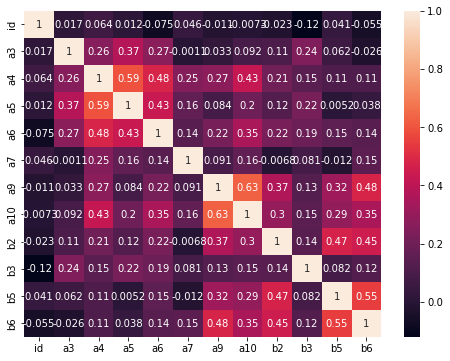

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(Corr_matriz, annot=True)
plt.show()

**Consideraciones:**

* Morado obscuro: <0 Asociación entre variables negativa, o bien que hay una relación inversa entre variables.
* Morado claro: correlación positiva débil
* Rosa: correlación positiva débil
* Coral: Correlación positiva
* Naranja: correlación positiva fuerte.

**Variables con correlación positiva y positiva fuerte**: a4 y a5, b5 y b6, a9 y a10

**Variables con correlación positiva débil**: a3, a4 y a5, a4 y a6 con a10, a9, y b2, a9, 10 y b2 con b5 y b6.

**Conclusiones:**

1.

2.

3.


## Establecimiento de criterios para análisis de cambios.

**Alimentación.**

In [13]:
df_numeric['s1'] = 2*df_numeric['a4'] + 2*df_numeric['a5'] + 2*df_numeric['a6'] + 3*df_numeric['a9'] + 4*df_numeric['a10']

<AxesSubplot:xlabel='s1', ylabel='Count'>

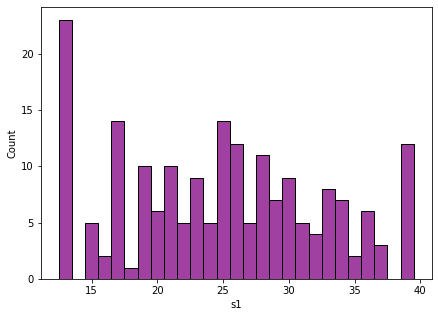

In [14]:
f, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data= df_numeric, x="s1", discrete=True, color = 'purple')

**Actividad física.**

In [15]:
df_numeric['v1'] = 2*df_numeric['b2'] + 2*df_numeric['b3'] + 3*df_numeric['b6']

In [16]:
df_numeric['v2'] = df_numeric['v1']

In [17]:
df_numeric['v2'].replace(to_replace = list(range(7,22)), value = list(np.repeat(np.array(["Positivo", 'Neutral', "Negativo"]), [5,5,5], axis=0)), inplace = True)

## Prueba de hipótesis. 

1. **Objetivo:** Analizar si hubo un cambio en los hábitos alimenticios y/ actividad física en estuadiantes

    a) **Alimentación.**
    
    * Variables a considerar:comidas rápida (a4),snacks (a5), bebidas azucaradas (a6), preopcupación por alimentación (a9), cambio alimentación (a10)
    
    * Prueba: Mc Nemar, ya que puede ayudar a ver si hubo un cambio
    
        - H0: No hubo cambios en los hábitos alimenticios.
        - H1: Hubo cambios en los hábitos alimenticios.
            
    b) **Actividad física.**
    
    * Variables a considerar:cantidad de ejercicio (b2), estar sentado (b3), preocupación por actividad física (b6)
    
    * Prueba: Mc Nemar, ya que puede ayudar a ver si hubo un cambio
    
        - H0: No hubo cambios en la actividad física.
        - H1: Hubo cambios en la actividad física.

### Prueba McNemar para cambios.

**Alimentación.**

In [18]:
tabla_s1 = [[df_numeric['s1'][(df_numeric['s1'] > 22) & (df_numeric['s1'] < 31)].count(),df_numeric['s1'][df_numeric['s1'] >= 31].count()],
            [df_numeric['s1'][df_numeric['s1'] <= 22].count(),df_numeric['s1'][(df_numeric['s1'] > 22) & (df_numeric['s1'] < 31)].count()]]

In [19]:
tabla_s1

[[72, 47], [76, 72]]

In [20]:
from statsmodels.stats.contingency_tables import mcnemar

In [21]:
print(mcnemar(tabla_s1, exact=False))

pvalue      0.011580533836671717
statistic   6.373983739837398


*Conclusiones:*

P-value menor a 0.05

La proporción de personas que cambiaron sus habitos despues de la pandemia es estadisticamente significantemente.

**Actividad física.**

In [22]:
tabla_v1 = [[df_numeric['v2'][df_numeric['v2'] == 'Neutral'].count(),df_numeric['v2'][df_numeric['v2'] == 'Negativo'].count()],
             [df_numeric['v2'][df_numeric['v2'] == 'Positivo'].count(),df_numeric['v2'][df_numeric['v2'] =='Neutral'].count()]]

In [23]:
tabla_v1

[[82, 57], [56, 82]]

In [24]:
print(mcnemar(tabla_v1, exact=False))

pvalue      1.0
statistic   0.0


*Conclusiones:*

P-valor mayor a 0.05

La proporción de personas que cambiaron sus habitos despues de la pandemia NO es estadisticamente significantemente.

2. **Objetivo:** Analizar si los cambios los hábitos alimenticios y/ actividad física en estuadiantes fueron saludables o no.

    a) **Alimentación.**
    
    * Variables a considerar: comidas rápida (a4),snacks (a5), bebidas azucaradas (a6), preopcupación por alimentación (a9), cambio alimentación (a10)
        
    * Prueba: prueba de proporciones para ver si es mayor la proporción de hábitos saludables que la de habitos poco saludables
    
        - H0: Los cambios de hábitos en alimentación no fueron saludables.
        - H1: Los cambios de hábitos en alimentación fueron saludables.
            
    b) **Actividad física.**
    
    * Variables a considerar: cantidad de ejercicio (b2), estar sentado (b3), preocupación por actividad física (b6)
    
    * Prueba: prueba de proporciones para ver si es mayor la proporción de personas que aumentaron su actividad física que las que no.
    
        - H0: Los cambios de hábitos en de actividad física no mejoraron. 
        - H1: Los cambios de hábitos en de actividad física mejoraron.

### Prueba Z de proporciones 

**Alimentación.**

In [25]:
from statsmodels.stats.proportion import proportions_ztest

In [26]:
count = df_numeric['s1'][df_numeric['s1'] <= 22].count()+df_numeric['s1'][df_numeric['s1'] >= 31].count()
nobs = 195
stat, pval = proportions_ztest(count, nobs, value = 0.50, alternative = 'larger')
print(pval)

7.719755606650315e-05


*Conclusiones:*

P-value menor a 0.05

La proporción de personas que han cambiado sus hábitos alimenticios es significativamente mayor al 50%

**Actividad física.**

In [27]:
count = df_numeric['v2'][df_numeric['v2'] == 'Positivo'].count()+df_numeric['v2'][df_numeric['v2'] == 'Negativo'].count()
nobs = 195
stat, pval = proportions_ztest(count, nobs, value = 0.50, alternative = 'larger')
print(pval)

0.01227051972583473


*Conclusiones:*

P-value menor a 0.05

La proporción de personas que han cambiado sus hábitos de actividad fisica es significativamente mayor al 50%

### Pruebas de independencia para tablas de contingencia con ChiCuadrada.

3. **Objetivo:** Analizar si el cambio de alimentación dependía de la ansiedad.
    
    * Variables a considerar: a2, a4, a5, a6, a9, a11
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** El cambio de alimentación NO depende de si tuvo más ansiedad 

        - **H1:** El cambio de alimentación depende de si tuvo más ansiedad

#### Alimentación.

In [28]:
df_numeric['s2'] = df_numeric['s1']

In [29]:
df_numeric['s2'].replace(to_replace = list(range(13,40)), value = list(np.repeat(np.array(["Positivo", 'Neutral', "Negativo"]), [10,8,9], axis=0)), inplace = True)

In [30]:
from scipy.stats import chi2_contingency

In [31]:
table_a2 = pd.crosstab(df_numeric['s2'], df_numeric['a2'])

In [32]:
table_a2

a2,De acuerdo,Desacuerdo,Ni en desacuerdo ni de acuerdo
s2,,,
Negativo,28,5,14
Neutral,36,14,22
Positivo,43,18,15


In [33]:
stat, p, dof, expected = chi2_contingency(table_a2)

In [34]:
p

0.2745521819728684

*Conclusiones:*

P-valor mayor a 0.05

No hay evidencia de dependencia en las variables Puntaje de cambios alimenticios y Ansiedad

4. **Objetivo:** Analizar si el cambio de alimentación dependía del cambio de horarios de comida.
    
    * Variables a considerar: a1, a4, a5, a6, a9, a11
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** El cambio de alimentación NO depende de si hubo cambios de horarios de comida 

        - **H1:** El cambio de alimentación depende de si hubo cambios de horarios de comida

In [35]:
tabla_a1 = pd.crosstab(df_numeric['s2'], df_numeric['a1'])

In [36]:
tabla_a1

a1,De acuerdo,Desacuerdo,Ni en desacuerdo ni de acuerdo
s2,,,
Negativo,31,7,9
Neutral,35,15,22
Positivo,42,14,20


In [37]:
stat, p, dof, expected = chi2_contingency(tabla_a1)

In [38]:
p

0.47715646602762296

*Conclusiones:*

P-valor mayor a 0.05

No hay evidencia de dependencia en las variables Puntaje de cambios alimenticios y Cambios en horarios de comida

5. **Objetivo:** Analizar si el cambio de alimentación dependía del tiempo libre para preparar comida
    
    * Variables a considerar: a4, a5, a6, a8, a9, a11
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** El cambio de alimentación NO depende de si tuvo más tiempo libre para preparar comida

        - **H1:** El cambio de alimentación depende de si tuvo más tiempo libre para preparar comida

In [39]:
tabla_a8 = pd.crosstab(df_numeric['s2'], df_numeric['a8'])

In [40]:
tabla_a8

a8,De acuerdo,Desacuerdo,Ni en desacuerdo ni de acuerdo
s2,,,
Negativo,12,14,21
Neutral,30,11,31
Positivo,49,12,15


In [41]:
stat, p, dof, expected = chi2_contingency(tabla_a8)

In [42]:
p

0.00023625485105480105

*Conclusiones:*

P-valor menor a 0.05

Hay evidencia significativa de dependencia entre las variables Puntaje de cambios alimenticios y Cambio en la cantidad de tiempo libre

#### Actividad física.

6. **Objetivo:** Analizar si los cambios de actividad fisica dependía del cambio de rutina de ejercicio
    
    * Variables a considerar: b1, b2, b3, b7
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** Los cambios de actividad física NO dependen del cambio de rutina de ejercicio

        - **H1:** Los cambios de actividad fsica NO dependen del cambio de rutina de ejercicio

In [43]:
tabla_b1 = pd.crosstab(df_numeric['v2'], df_numeric['b1'])

In [44]:
tabla_b1

b1,De acuerdo,Desacuerdo,Ni desacuerdo ni de acuerdo
v2,,,
Negativo,34,13,10
Neutral,32,8,42
Positivo,44,4,8


In [45]:
stat, p, dof, expected = chi2_contingency(tabla_b1)

In [46]:
p

4.329813193308304e-07

*Conclusiones:*

P-valor menor a 0.05

Hay evidencia significativa de dependencia entre las variables Puntaje de cambios de actividad física y Cambio de rutina

7. **Objetivo:** Analizar si los cambios de actividad física dependía del Cambio en la cantidad de tiempo libre
    
    * Variables a considerar: b2, b3, b4, b7
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** Los cambios de actividad física NO dependen del Cambio en la cantidad de tiempo libre

        - **H1:** Los cambios de actividad física NO dependen del Cambio en la cantidad de tiempo libre

In [47]:
tabla_b4 = pd.crosstab(df_numeric['v2'], df_numeric['b4'])

In [48]:
tabla_b4

b4,De acuerdo,Desacuerdo,Ni en desacuerdo ni de acuerdo
v2,,,
Negativo,22,21,14
Neutral,37,15,30
Positivo,44,5,7


In [49]:
stat, p, dof, expected = chi2_contingency(tabla_b4)

In [50]:
p

9.588951990252028e-06

*Conclusiones:*

P-valor menor a 0.05

Hay evidencia significativa de dependencia entre las variables Puntaje de cambios de actividad física y Cambio en la cantidad de tiempo libre

8. **Objetivo:** Analizar si los cambios de actividad física dependía de la motivación
    
    * Variables a considerar: b2, b3, b5, b7
        
    * Prueba: prueba de chi cuadrada, ya que mide la relación entre una variable dependiente e independiente.
        
        - **H0:** Los cambios de actividad física NO dependen de la motivación
        - **H1:** Los cambios de actividad física NO dependen de la motivación

In [51]:
tabla_b5 = pd.crosstab(df_numeric['v2'], df_numeric['b5'])

In [52]:
tabla_b5

b5,1,2,3
v2,,,
Negativo,8,20,29
Neutral,22,43,17
Positivo,46,7,3


In [53]:
stat, p, dof, expected = chi2_contingency(tabla_b5)

In [54]:
p

4.2769043410068484e-16

*Conclusiones:*

P-valor menor a 0.05

Hay evidencia significativa de dependencia entre las variables Puntaje de cambios de actividad físca y Motivación

## Pruebas de asociación de variables y causalidad

**Creación de función:**

### Prueba V de Cramer ajustada

In [55]:
import scipy. stats  as stats 

In [67]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [68]:
cramers_corrected_stat(tabla_a8.to_numpy())

0.2136603048161546

**Hábitos alimenticios**

### Prueba Goodman-Kruskal’s Lamba

In [69]:
from pypair.contingency import CategoricalTable

In [70]:
tablaC_a8 = CategoricalTable(df_numeric['s2'], df_numeric['a8'])
tablaC_a8.gk_lambda

0.09090909090909091

In [71]:
tablaC_a8.gk_lambda_reversed

0.144

**Conclusiones:**
    
    -Causalidad debil entre las variables Puntaje de cambios alimenticios y Cambio en la cantidad de tiempo libre

    -Cambio en la cantidad de tiempo libre causa debilmente Puntaje

**Actividad física**

### Prueba V de Cramer ajustada

In [72]:
cramers_corrected_stat(tabla_b1.to_numpy())

0.28398419230410776

Asociación debil entre las variables Puntaje de cambios de actividad fisica y Cambio de rutina

In [73]:
cramers_corrected_stat(tabla_b4.to_numpy())

0.2521605199902538

Asociación debil entre las variables Puntaje de cambios de actividad fisica y Cambio en la cantidad de tiempo libre

In [74]:
cramers_corrected_stat(tabla_b5.to_numpy())

0.4382646834421132

Asociación moderada entre las variables Puntaje de cambios de actividad fisica y Motivación

### Prueba Goodman-Kruskal’s Lamba

In [75]:
tablaC_b1 = CategoricalTable(df_numeric['v2'], df_numeric['b1'])
tablaC_b1.gk_lambda

0.10989010989010989

In [76]:
tablaC_b1.gk_lambda_reversed

0.14285714285714285

Causalidad debil entre las variables Puntaje de cambios de actividad fisica y Cambio de rutina

Cambio de rutina causa debilmente Puntaje

In [77]:
tablaC_b4 = CategoricalTable(df_numeric['v2'], df_numeric['b4'])
tablaC_b4.gk_lambda

0.0

In [78]:
tablaC_b4.gk_lambda_reversed

0.1092436974789916

Causalidad debil entre las variables Puntaje de cambios de actividad fisica y Cambio en la cantidad de tiempo libre

Cambio en la cantidad de tiempo libre causa debilmente Puntaje

In [79]:
tablaC_b5 = CategoricalTable(df_numeric['v2'], df_numeric['b5'])
tablaC_b5.gk_lambda

0.0

In [80]:
tablaC_b5.gk_lambda_reversed

0.0

Causalidad moderada entre las variables Puntaje de cambios de actividad fisica y Motivación

Puntaje causa moderadamente Motivación